# Implementado K-means

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.silhouette import silhouette_visualizer

sns.set_theme(style="whitegrid", context='notebook', palette='pastel')

# Preparand datos de prueba

In [19]:
from sklearn.datasets import make_blobs
X, y, centroide = make_blobs(n_samples=500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

Visualizamos X,Y e C

In [20]:
X

array([[-1.96768758, -4.15300624],
       [-4.12637517, -6.96757912],
       [-1.9067437 , -4.8164363 ],
       [-7.34917934,  9.06988256],
       [-0.56296339, -7.60270771],
       [-5.46796815, -7.60991042],
       [-2.0806755 , -5.4717478 ],
       [-7.84482686,  8.94680343],
       [-4.79764407, -6.32919384],
       [-4.79441028, -9.20779131],
       [-1.79205369, -6.31297954],
       [-4.02969142, -4.65007361],
       [-4.92991099, -8.37786181],
       [-0.819203  , -7.1371505 ],
       [-6.41929288,  8.01248066],
       [-1.87294752, -4.77789202],
       [-3.42010901, -3.75404294],
       [-7.19041912,  8.73804667],
       [-5.53674486, -7.56366439],
       [-1.92782355, -4.92790707],
       [-7.06157155, 10.52152539],
       [-6.14351995,  6.54389899],
       [-4.66752831, -8.15574201],
       [-1.25023912, -8.33341779],
       [-1.49908565, -4.9612011 ],
       [-3.19395479, -6.86517066],
       [-5.26330321, -7.85194929],
       [-6.65756769,  8.26395183],
       [-6.12642714,

In [21]:
y

array([0, 3, 0, 2, 1, 3, 1, 2, 3, 3, 1, 0, 3, 1, 2, 0, 0, 2, 3, 0, 2, 2,
       3, 1, 0, 3, 3, 2, 2, 0, 2, 1, 2, 1, 0, 3, 0, 1, 2, 0, 3, 3, 3, 1,
       0, 3, 0, 2, 3, 3, 1, 0, 0, 1, 2, 0, 1, 2, 3, 2, 3, 3, 2, 3, 2, 0,
       0, 3, 1, 0, 2, 1, 2, 2, 1, 2, 2, 3, 0, 2, 3, 3, 0, 3, 2, 0, 3, 0,
       0, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 3, 2, 0, 0, 2, 2, 0,
       3, 2, 0, 0, 2, 2, 2, 0, 1, 3, 0, 1, 2, 2, 0, 1, 3, 1, 1, 2, 0, 0,
       2, 0, 1, 1, 0, 3, 2, 3, 0, 0, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 2, 1,
       0, 1, 2, 2, 3, 1, 3, 3, 1, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 1, 2, 2, 3, 2, 1, 0, 3, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 3, 1, 3, 1, 3, 3, 2, 1, 0, 1, 0, 3, 2, 0, 3, 2, 2, 1, 2, 0,
       0, 0, 1, 3, 0, 3, 2, 0, 0, 3, 2, 3, 1, 2, 3, 0, 0, 1, 1, 2, 1, 3,
       3, 3, 2, 1, 3, 0, 3, 2, 1, 3, 3, 1, 3, 0, 3, 3, 2, 2, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 0, 1, 1, 1, 3, 0, 1, 3, 2, 0, 3, 0, 1, 2, 3, 1, 0,
       2, 1, 2, 2, 3, 3, 0, 1, 1, 3, 2, 3, 3, 2, 2,

In [22]:
centroide

array([[-2.59981168, -4.05239051],
       [-1.22160533, -6.94497251],
       [-7.10405135,  8.46520933],
       [-4.81276047, -7.33823041]])

## Creando nuestro dataset

In [23]:
df = pd.DataFrame({
    "x1": X[:,0],
    "x2": X[:,1],
    "y": y
})

In [24]:
df

,x1,x2,y
0,-1.967688,-4.153006,0
1,-4.126375,-6.967579,3
2,-1.906744,-4.816436,0
3,-7.349179,9.069883,2
4,-0.562963,-7.602708,1
...,...,...,...
495,-7.563521,9.849606,2
496,-4.394459,-8.419182,3
497,-7.616375,7.504935,2
498,-5.684675,8.548051,2


In [25]:
# Crear un DataFrame de los centroides
df_centers = pd.DataFrame({
    'x1': centroide[:,0],
    'x2': centroide[:,1]
})

In [26]:
df_centers

,x1,x2
0,-2.599812,-4.052391
1,-1.221605,-6.944973
2,-7.104051,8.465209
3,-4.812760,-7.338230


# Vsiaulizacion de datos

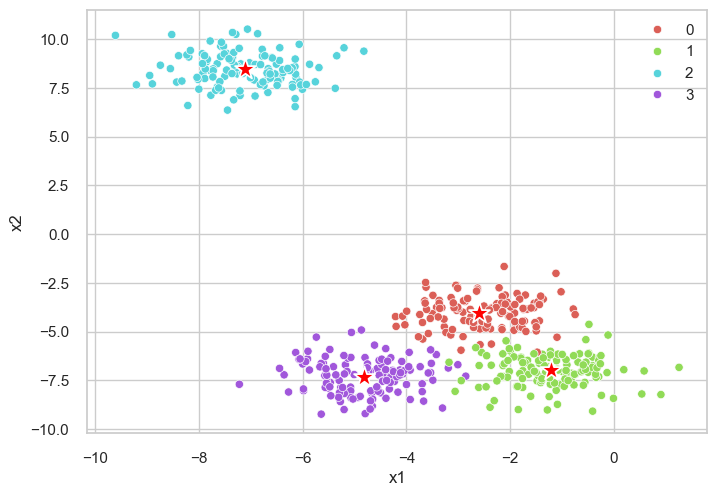

In [27]:
# Visualizacion del scatter plot de los datos en df
sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='y',
    legend='auto',
    palette=sns.color_palette("hls", 4)
);

# Visualizacion del scatter plot de los centro en df_enters
sns.scatterplot(
    data=df_centers,
    x='x1',
    y='x2',
    marker='*',
    s=250,
    color='red'
)
plt.show()

Aplicando K-means

In [28]:
# Instancia del modelo
k_means = KMeans(n_clusters=4, random_state=0, n_init='auto')

In [29]:
# Entrenar y guardar las predicciones del Modelo K-Means
import pandas as pd
clusters = k_means.fit_predict(X)

# Guardar cluster en el dataframe original
df['cluster'] = clusters

# Guardar los centros de los cluster generados por K-Means
k_means_centers = k_means.cluster_centers_

# Guardar los centros de los cluster en un dataframe
df_k_means_centers = pd.DataFrame({
    "x1": k_means_centers[:, 0],
    "x2": k_means_centers[:, 1]
})

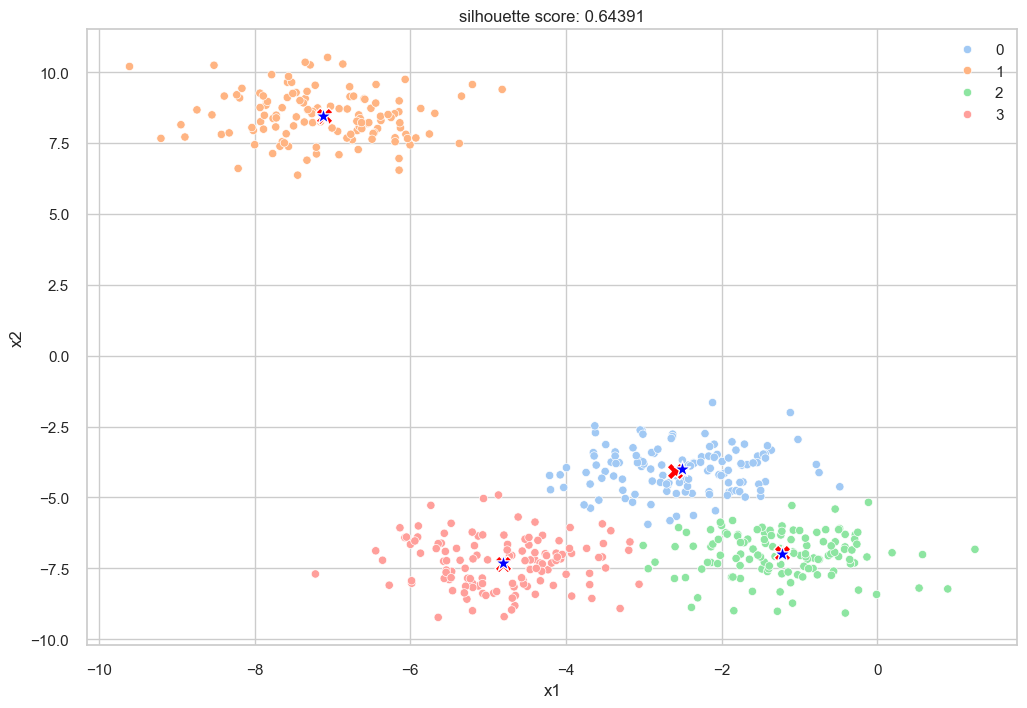

In [30]:
plt.figure(figsize=(12,8))

# Visualización del scatter plot de los datos en df_blobs
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='pastel')

# Visualización del scatter plot de los centros en df_centers
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='red')

# Visualización del scatter plot de los centros de K-means en df_kmeans_center
sns.scatterplot(data=df_k_means_centers, x='x1', y='x2', marker='*', s=150, color='blue')

plt.title(f'silhouette score: {silhouette_score(X,df["cluster"]).round(5)}')
plt.show()

En nuestro ejemplo, el silhouette score obtenido fue del **0.64%**. Ahora es el momento de que experimentes y pruebes con distintos números de clusters (k) y desviación estándar para observar cómo cambia el gráfico en función de la cantidad de grupos que creemos que existen en los datos.

In [40]:
def viz_cluster(k,ax=None):
    # Crear una instancia del algoritmo K-means con 4 clusters
    kmeans = KMeans(n_clusters=k, n_init="auto")
    # Realizar el agrupamiento y obtener las etiquetas de los clusters para cada punto de datos en x
    df_cluster = kmeans.fit_predict(X)
    # Agregar la columna 'cluster' al DataFrame df_blobs con las etiquetas de los clusters
    df['cluster'] = df_cluster
    # Obtener los centros de los clusters generados por K-means
    k_means_centers = kmeans.cluster_centers_
    # Crear un DataFrame df_kmeans_center con los centros de los clusters
    df_kmeans_center = pd.DataFrame(
        {
            'x1': k_means_centers[:,0],  # Primera columna de k_means_centers
            'x2': k_means_centers[:,1]   # Segunda columna de k_means_centers
        }
    )
    plt.figure(figsize=(12,8))
    # Visualización del scatter plot de los datos en df_blobs
    sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='pastel',ax=ax);
    # Visualización del scatter plot de los centros en df_centers
    sns.scatterplot(data=df_centers, x='x1', y='x2', marker='*', s=250, color='red',ax=ax);
    # Visualización del scatter plot de los centros de K-means en df_kmeans_center
    sns.scatterplot(data=df_kmeans_center, x='x1', y='x2', marker='o', s=250, color='purple',ax=ax)
    if ax != None:
        ax.set_title(f'silhouette score: {silhouette_score(X,df["cluster"]).round(5)}');
    else:
        plt.title(f'silhouette score: {silhouette_score(X,df["cluster"]).round(5)}');

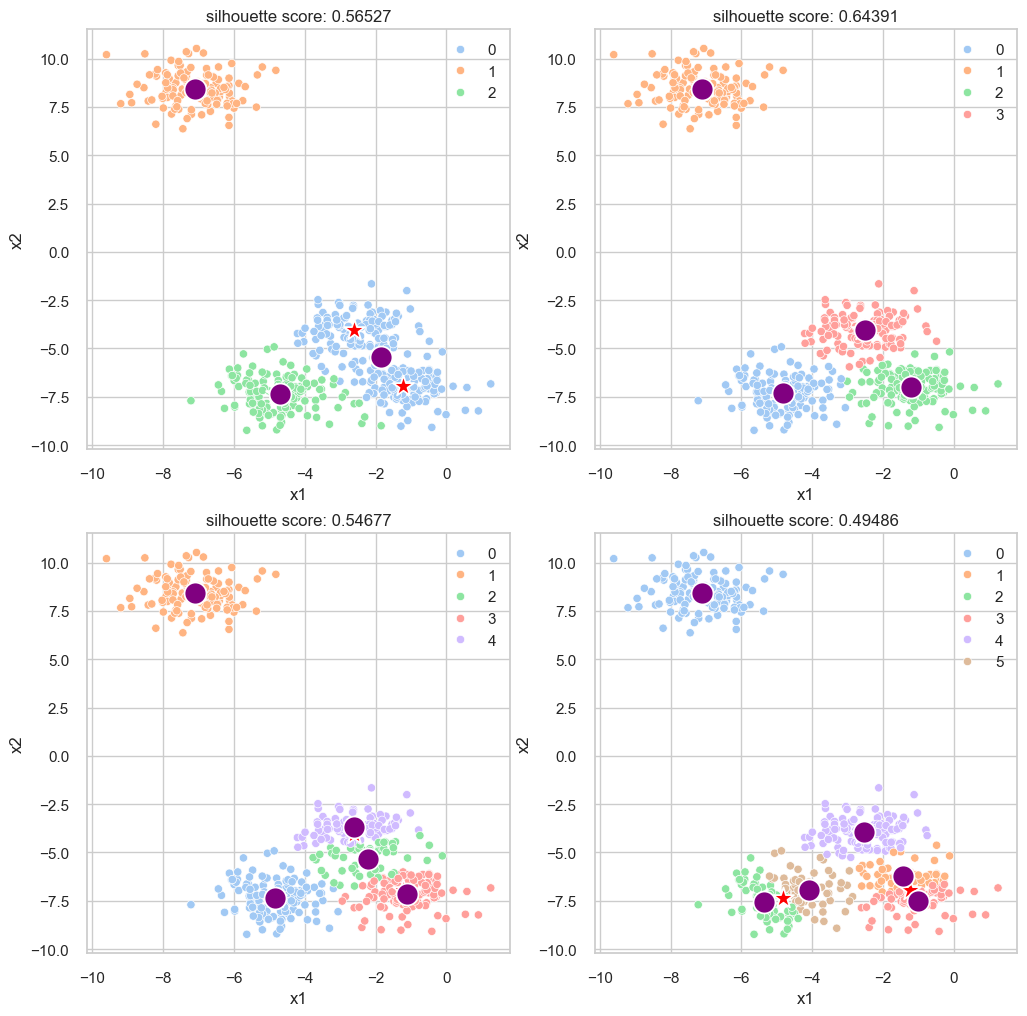

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        viz_cluster(i * 2 + j + 3, ax=ax)

Con esta simple iteración, pudimos comparar diferentes segmentaciones de K-means y evaluar su coeficiente de silueta. Descubrimos que la mejor segmentación, en este ejemplo práctico, fue con 4 clusters. Sin embargo, en casos con múltiples dimensiones y limitaciones de recursos, el método del codo puede ser útil para determinar el valor óptimo de K.

## Encontrando el valor de K

In [42]:
sum_of_squared_distance = []

K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    km = km.fit(X)
    sum_of_squared_distance.append(km.inertia_)

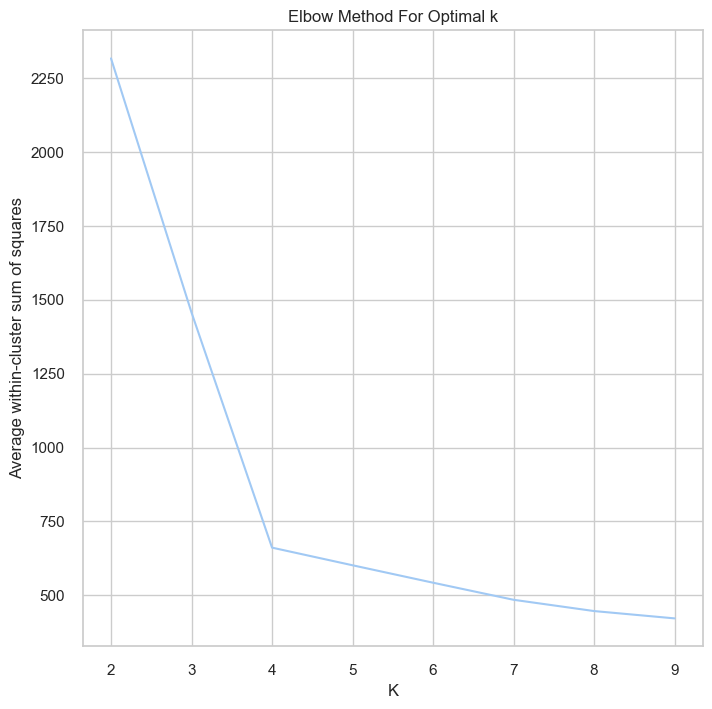

In [44]:
# Graficando
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('K')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow Method For Optimal k')
plt.show()

Al observar el gráfico del método del codo, podemos identificar que la línea muestra un quiebre en el valor 4, lo cual indica que ese es el valor óptimo de
K para la segmentación mediante K-means. Este quiebre es un indicador de la elección adecuada del número de clusters.

Ahora utilizaremos el coeficiente de silueta para determinar el número óptimo de clusters (K). Calcularemos el índice de silueta para diferentes valores de K y seleccionaremos aquel que obtenga el valor más alto, lo cual nos indicará la mejor segmentación en términos de la calidad de los clusters.

In [45]:
silhouette_s = []

K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    km = km.fit(X)
    # Hacer predicciones
    y = km.predict(X)
    silhouette_s.append(silhouette_score(X, y))

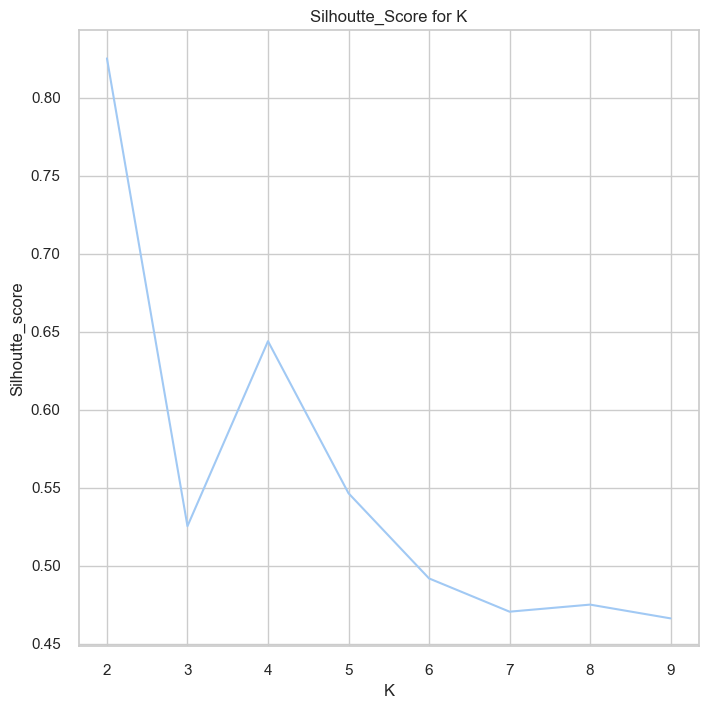

In [46]:
# Graficando
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_s, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhoutte_score')
plt.title('Silhoutte_Score for K')
plt.show()

Un K igual a 4 obtiene el coeficiente de silueta más alto, reafirmando que esa es la mejor opción para la segmentación de clusters.

Ahora exploraremos la gráfica de silueta utilizando el valor óptimo de K que determinamos previamente con las técnicas mencionadas. Esta gráfica nos brindará una visualización más detallada de la calidad de la segmentación y la separación de los clusters.

# Evaluando resultados de K-means

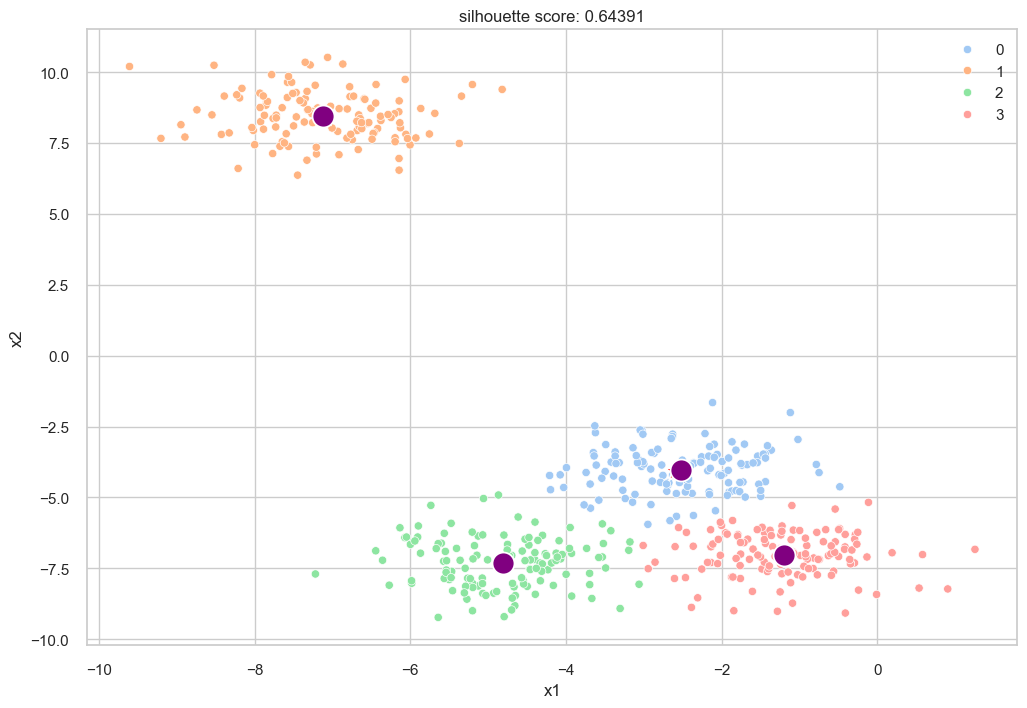

In [47]:
# Visualizamos los clusters con el valor optimo de K
viz_cluster(4)

[silhousette - quick method](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

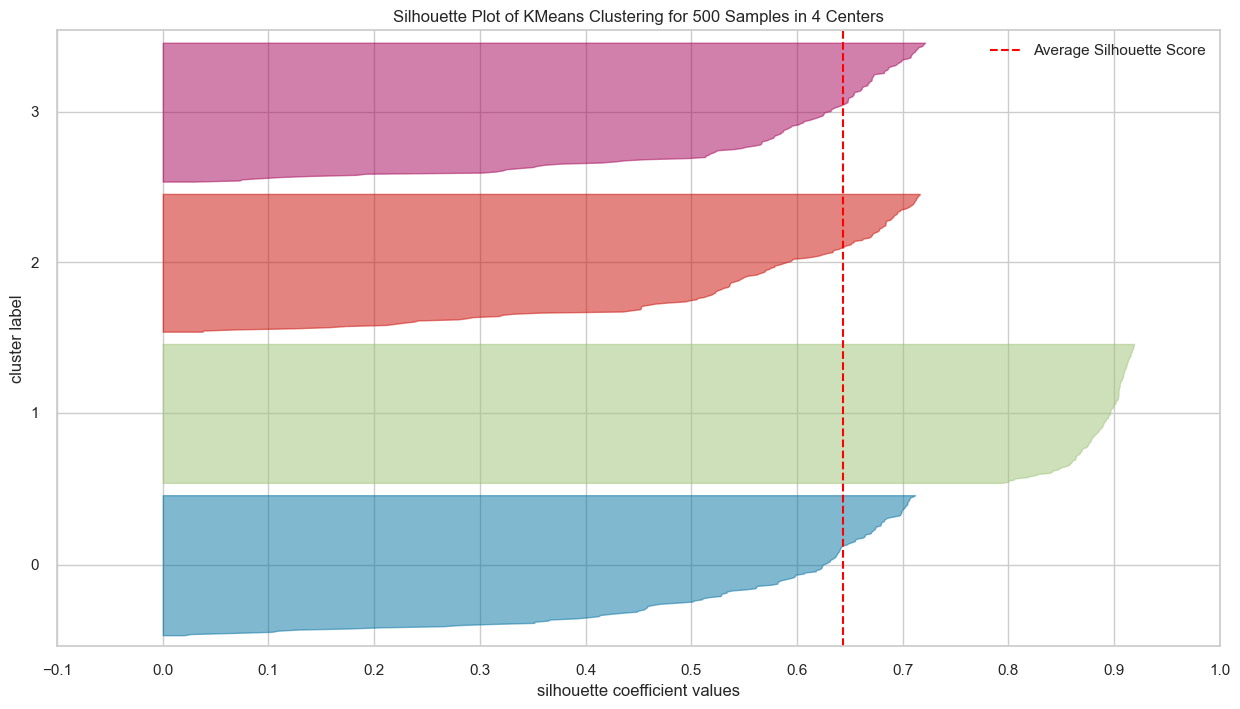

Silhoutte_score:  0.6439080841645693


In [48]:
# Graficamos con la ayuda de silhoette_visualizer
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4, random_state=0, n_init="auto")
silhouette_visualizer(km, X, colors="yellowbrick");
km.fit(X)
print("Silhoutte_score: ",silhouette_score(X, km.predict(X)))